# Claude Sonnet 3.5 V2 with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.5 V2 with prompt from 2/17/25.

This prompt is built from the v2.14 v2 version by adding additional instructions based on analysis of failed predictions; specifically, additional language is added to emphasize that "overrule" in this context only refers to "overrule" by the Acting Case and not by any other case.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v217
MODEL_ID = "us.anthropic.claude-3-7-sonnet-20250219-v1:0"
SYSTEM_PROMPT = claude_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 4
INFO:root:Completed: 0
INFO:root:Completed: 1
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 15
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 22
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 26
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 4s, sys: 6.28 s, total: 1min 10s
Wall time: 21min 37s


[{'0004.91306_cites_88240.txt': {'model': 'us.anthropic.claude-3-7-sonnet-20250219-v1:0',
   'input_tokens': 2427,
   'output_tokens': 106,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': "The passage merely references the Target Case (Texas v. Hardenberg) as a prior decision that was reconsidered and declared satisfactory. There is no indication that the Acting Case overrules or reverses the Target Case. Instead, the passage suggests that the Target Case's reasoning was affirmed and relied upon in subsequent cases.",
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage merely references the Target Case (Texas v. Hardenberg) as a prior decision that was reconsidered and declared satisfactory. There is no indication that the Acting Case overrules or reverses the Target Case. Instead, the passage suggests that the Target Case\'s reasoning was affirmed and relied upon in subsequent cases."\n}\n```'}},
 {'0003.91306_cites_876

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2427,106,no,0.95,The passage merely references the Target Case ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0003.91306_cites_87633.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2461,112,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0005.91306_cites_88693.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2432,116,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0001.91306_cites_88061.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3263,110,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
4,0002.91306_cites_88994.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2944,144,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/1.claude/7.sonnet3.7_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

2

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/1.claude/7.sonnet3.7_v217_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3263,110,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2944,144,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2461,112,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2427,106,no,0.95,The passage merely references the Target Case ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2432,116,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     874
yes    210
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

3972402

In [16]:
eval_df["output_tokens"].sum()

146084

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.91      0.94       935
         Yes       0.60      0.84      0.70       149

    accuracy                           0.90      1084
   macro avg       0.78      0.87      0.82      1084
weighted avg       0.92      0.90      0.91      1084



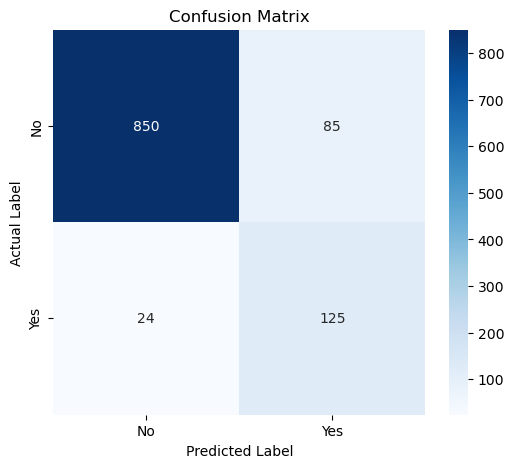

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.60
Recall: 0.84
F-score: 0.70
Specificity: 0.91
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 125
True negatives: 850
False positives: 85
False negatives: 24


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

85

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

24

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3263,110,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2944,144,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2461,112,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2427,106,no,0.95,The passage merely references the Target Case ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2432,116,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [24]:
eval_df.to_csv("predictions/1.claude/7.sonnet3.7_v217_prompt_eval.csv", index=False)